 Using ADASYN to oversample the classification target variable

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN

# I had to choose Python 3.9.13 in order to utilize imblearn library

In [3]:
# all data numeric
df = pd.read_csv("bank_numeric.csv")

<Axes: xlabel='deposit', ylabel='Count'>

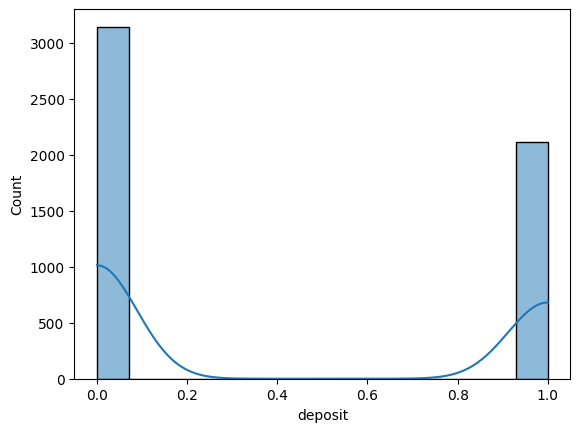

In [4]:
# let's check the distrubution
sns.histplot(data=df, x="deposit", kde=True)

# deposit is the target variable
# and it is in balance

In [5]:
# but on the other side, 
# the difference is almost 1/3
df['deposit'].value_counts()

0    3144
1    2113
Name: deposit, dtype: int64

In [6]:
# checking correlation before modifactions
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.046310,-0.361756,-0.086575,0.016081,0.040015,-0.025932,0.010603,0.064056,-0.016202,0.067119,-0.018257,0.018385,-0.015744,-0.025713,0.025547,-0.073356
job,-0.046310,1.000000,0.084096,0.177061,0.011183,0.048050,-0.149819,-0.075700,-0.100516,0.019065,0.031832,-0.006293,0.025821,0.013559,0.013069,-0.022213,0.022639
marital,-0.361756,0.084096,1.000000,0.126338,-0.011507,0.058797,-0.095401,-0.085723,-0.056306,0.001891,-0.057846,0.006076,-0.047438,0.044357,0.052304,-0.059894,0.076330
education,-0.086575,0.177061,0.126338,1.000000,-0.000244,0.069207,-0.178715,-0.081551,-0.170038,0.013022,0.055575,-0.031120,-0.004323,0.055744,0.084364,-0.098299,0.105812
default,0.016081,0.011183,-0.011507,-0.000244,1.000000,-0.138655,-0.005720,0.085907,0.047922,0.012401,0.013740,-0.018819,0.041949,-0.035601,-0.037888,0.042798,-0.026915
balance,0.040015,0.048050,0.058797,0.069207,-0.138655,1.000000,-0.072412,-0.104102,-0.026370,-0.008393,0.025626,0.026832,-0.050649,0.063122,0.064798,-0.071309,0.110684
housing,-0.025932,-0.149819,-0.095401,-0.178715,-0.005720,-0.072412,1.000000,0.045757,0.275504,-0.003239,-0.128723,0.055826,-0.007409,-0.065786,-0.098945,0.122871,-0.146347
loan,0.010603,-0.075700,-0.085723,-0.081551,0.085907,-0.104102,0.045757,1.000000,0.007449,0.021103,0.024514,0.010948,0.028002,-0.072061,-0.080624,0.089722,-0.081519
contact,0.064056,-0.100516,-0.056306,-0.170038,0.047922,-0.026370,0.275504,0.007449,1.000000,-0.004385,-0.163167,-0.022319,0.017467,-0.143107,-0.165263,0.185097,-0.236888
day,-0.016202,0.019065,0.001891,0.013022,0.012401,-0.008393,-0.003239,0.021103,-0.004385,1.000000,0.067070,-0.025917,0.168019,-0.054335,-0.056815,0.058949,-0.080099


In [7]:
# oversampling data

target = "deposit"

# let's use the variables that are already in numeric format for this demonstration purpose!
X = df.drop('deposit', axis=1)
y = df[target]

# Balancing classes equally
strategy = 'auto'

# create the ADASYN model
model = ADASYN(sampling_strategy="auto", random_state=42)

# resample X and y
X_resampled, y_resampled = model.fit_resample(X, y)

# reconstruct the dataframe
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled[target] = y_resampled

In [8]:
# combine dataframes, now we have the original data + newly generated data
df = pd.concat([df, df_resampled])

<Axes: xlabel='deposit', ylabel='Count'>

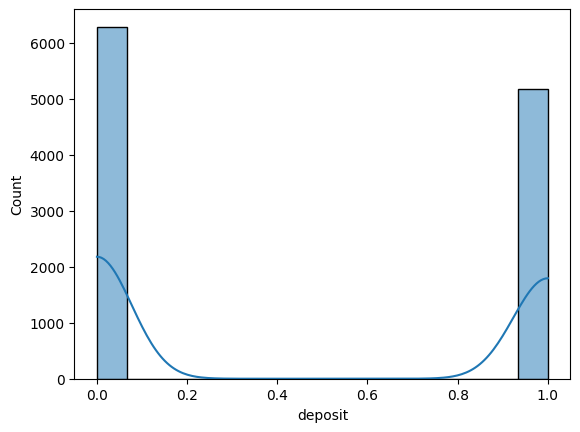

In [9]:
 # let's see new distribution, closer to balanced
sns.histplot(data=df, x="deposit", kde=True)

# whaaat? ahahah I was awaiting a different result

In [10]:
df['deposit'].value_counts()

# i thought that we have almost the same amount of values

0    6288
1    5178
Name: deposit, dtype: int64

In [ ]:
# checking correlation after modifactions
df.corr()

# I cannot say that there are big differences

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.045832,-0.352430,-0.078585,0.018523,0.037011,-0.010939,0.017259,0.072037,-0.012403,0.072657,-0.016008,0.026679,-0.011106,-0.020772,0.021095,-0.088180
job,-0.045832,1.000000,0.085757,0.173891,0.012169,0.046956,-0.139439,-0.071691,-0.096655,0.020359,0.031107,-0.005319,0.024991,0.014274,0.015021,-0.023659,0.017296
marital,-0.352430,0.085757,1.000000,0.129469,-0.006428,0.052183,-0.068090,-0.071015,-0.039913,0.007847,-0.049321,0.001392,-0.039376,0.047126,0.054957,-0.059051,0.039306
education,-0.078585,0.173891,0.129469,1.000000,0.001696,0.067730,-0.160029,-0.072613,-0.157810,0.019096,0.054391,-0.036978,-0.001249,0.057046,0.085897,-0.098544,0.079841
default,0.018523,0.012169,-0.006428,0.001696,1.000000,-0.135481,0.004080,0.089498,0.054266,0.013090,0.016352,-0.018141,0.045316,-0.033414,-0.035541,0.040640,-0.038675
balance,0.037011,0.046956,0.052183,0.067730,-0.135481,1.000000,-0.088334,-0.105479,-0.035180,-0.011559,0.022962,0.018731,-0.054665,0.062988,0.064784,-0.074430,0.116483
housing,-0.010939,-0.139439,-0.068090,-0.160029,0.004080,-0.088334,1.000000,0.068961,0.294512,0.006432,-0.103934,0.062110,0.012160,-0.054547,-0.085315,0.112331,-0.201518
loan,0.017259,-0.071691,-0.071015,-0.072613,0.089498,-0.105479,0.068961,1.000000,0.024613,0.025815,0.031694,0.011242,0.037760,-0.065809,-0.073930,0.084225,-0.114265
contact,0.072037,-0.096655,-0.039913,-0.157810,0.054266,-0.035180,0.294512,0.024613,1.000000,0.004109,-0.140707,-0.017591,0.029643,-0.133306,-0.154395,0.174951,-0.269128
day,-0.012403,0.020359,0.007847,0.019096,0.013090,-0.011559,0.006432,0.025815,0.004109,1.000000,0.066511,-0.020705,0.166810,-0.048281,-0.051214,0.053557,-0.090083
